In [1]:
import bct
from sklearn.manifold import TSNE

import plotting

def visualise_clustering(clusters, norm_vars, name):
    print(clusters.shape, norm_vars.shape)
    tsne = TSNE(
            n_components=2,
            perplexity=5,
            learning_rate=200,
            random_state=42,
        )
    tsne_results = tsne.fit_transform(norm_vars.T)
    print("TSNE results shape:", tsne_results.shape)

    plotting.visualise_tsne([clusters], tsne_results, name)

In [2]:
import plotting
import activations
import modcog_gen

def get_clusters(vars):
    vars_filtered = activations.filter_inactive_nodes(vars, threshold=1e-3)
    vars_norm = activations.normalize_variances_across_nodes(vars_filtered)
    clusters, silhouette_scores, cluster_list, optimal_k = activations.calculate_optimal_clusters(vars_norm)
    return clusters, silhouette_scores, cluster_list, optimal_k, vars_norm

def plot_clusters(clusters, silhouette_scores, cluster_list, optimal_k, vars_norm, envs, range=False, model_dir=None):
    plotting.visualise_cluster_score(silhouette_scores, optimal_k, subdir=model_dir)
    labels, vars = activations.sort_clusters(clusters, vars_norm)
    if range:
        cluster_indices = [optimal_k-2, 3, 8, 13]
        labels_list = []
        variances = []
        names = []
        for ix in cluster_indices:
            cluster = cluster_list[ix]
            labels, vars = activations.sort_clusters(cluster, vars_norm)
            labels_list.append(labels)
            variances.append(vars)
            if ix == optimal_k-2:
                names.append(f"Optimal clusters ({optimal_k})")
                continue
            names.append(f"{ix+2} clusters")
        plotting.visualise_task_variances(labels_list, names, variances, envs, subdir=model_dir)
    else:
        plotting.visualise_task_variances([labels], [f"Optimal ({optimal_k}) clusters"], [vars], envs, subdir=model_dir)

In [9]:
import numpy as np
import os
model_dir = "modcog/L1_single_20"
vars = np.load(os.path.join("data", model_dir, "modcog_vars.npy"))
clusters, silhouette_scores, cluster_list, optimal_k, vars_norm = get_clusters(vars)

In [21]:
import numpy as np
import os
model_dir = "task20/dynamic_embeddings/repulsion_1"
vars = np.load(os.path.join("data", model_dir, "vars.npy"))
clusters, silhouette_scores, cluster_list, optimal_k, vars_norm = get_clusters(vars.T)

Optimal number of clusters: 2
Silhouette scores: [0.46736694481319513, 0.36034504122074884, 0.3634870138342804, 0.359981712329072, 0.33058250638926706, 0.30338875168055085, 0.2609184363070499, 0.25061921744813387, 0.26940371839659627, 0.26468832986345914, 0.2770512009778317, 0.28637603720507915, 0.2881633713489409, 0.28249629979816676, 0.26962613064048035, 0.28041004899821254, 0.26830729565321776, 0.27764015382492885, 0.2745518042525248, 0.27370661449626255, 0.2831393148813234, 0.2697035895509141, 0.26814555389506106, 0.2465223253004323, 0.25490404712137404, 0.25354570223544637, 0.2510801513992095, 0.24125451294411063]
Saved silhouette score plot to plots/task20/dynamic_embeddings/repulsion_1/cluster_score.png


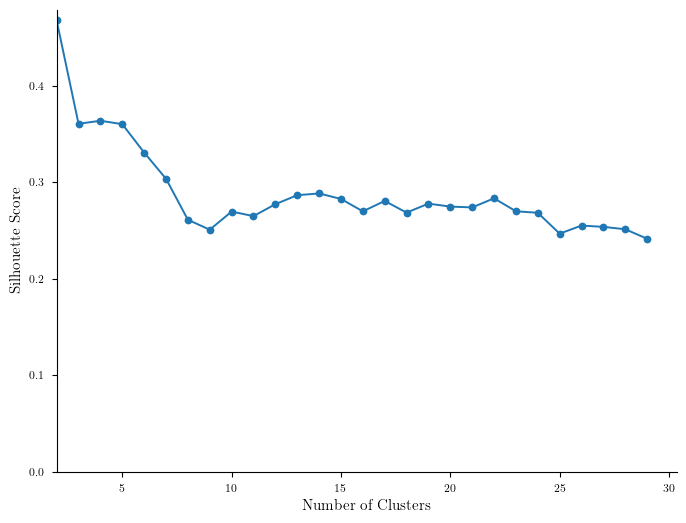

Number of clusters: 2
Number of clusters: 5
Number of clusters: 10
Number of clusters: 15


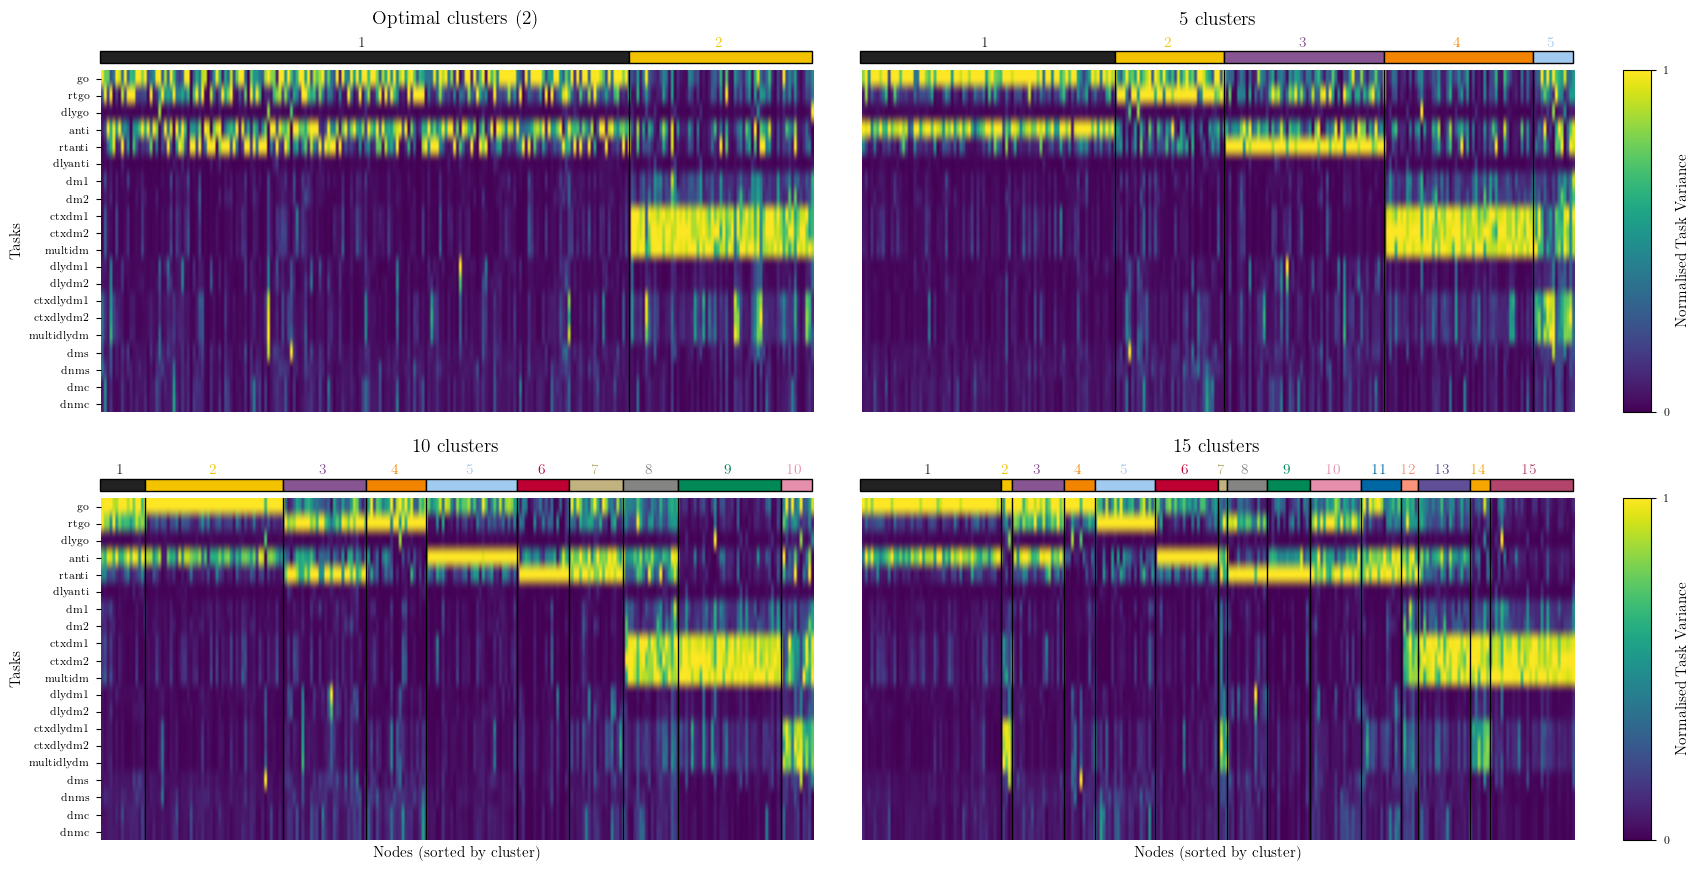

In [22]:
# envs = list(modcog_gen.original_envs.keys()) + list(modcog_gen.seq_envs.keys())
envs = list(modcog_gen.original_envs.keys())
plot_clusters(clusters, silhouette_scores, cluster_list, optimal_k, vars_norm, envs, model_dir=model_dir, range=True)